### 1. Carregando Bibliotecas

In [1]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.utils import np_utils
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
import tensorflow as tf

Inicializa o Google Drive. É necessário entrar com as credenciais do Gmail

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. Carregando o dataset pré-embaralhado de treinamento bem como os dados de teste

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


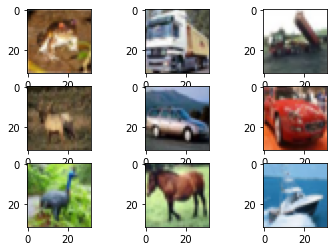

In [4]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividindo o dataset em treinamento, teste e validação

"One-hot encoding" aplicado aos rótulos


In [6]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
num_classes

10

divindo dataset de treinamento em treinamento, teste e validação - Apenas para exemplo em um ambiente real as amostras devem ser seleciondas de forma aleatória

In [9]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

Impressão da forma do conjunto de treino

In [10]:
print('x_train shape:', x_train.shape)

x_train shape: (45000, 32, 32, 3)


In [11]:
print('x_valid shape:', x_valid.shape)

x_valid shape: (5000, 32, 32, 3)


Impressão do número de imagens nos datasets de treinamento, teste e validação

In [12]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

45000 train samples
10000 test samples
5000 validation samples


### 5. Definindo a arquitetura do modelo (IMPORTANTE!) - Dicas

*   Tente utilizar 2-4 camadas convolucionais de tamanho progressivamente crescente
*   Use no máximo de 2 ou 3 camadas de "pooling" (2x2) após as camadas convolucionais
*   Use uma camada do tipo totalmente conectada de 128-512 neurônios
*   Use uma camada do tipo totalmente conectada de 64-256 neurônios
*   Ultimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
*   "Dropout" de 0,2-0,3







In [13]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D, BatchNormalization

In [14]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

Tentem executar a rede configurando outras funções de ativação (como visto em nossa Aula 3)
mais informações em https://keras.io/activations/

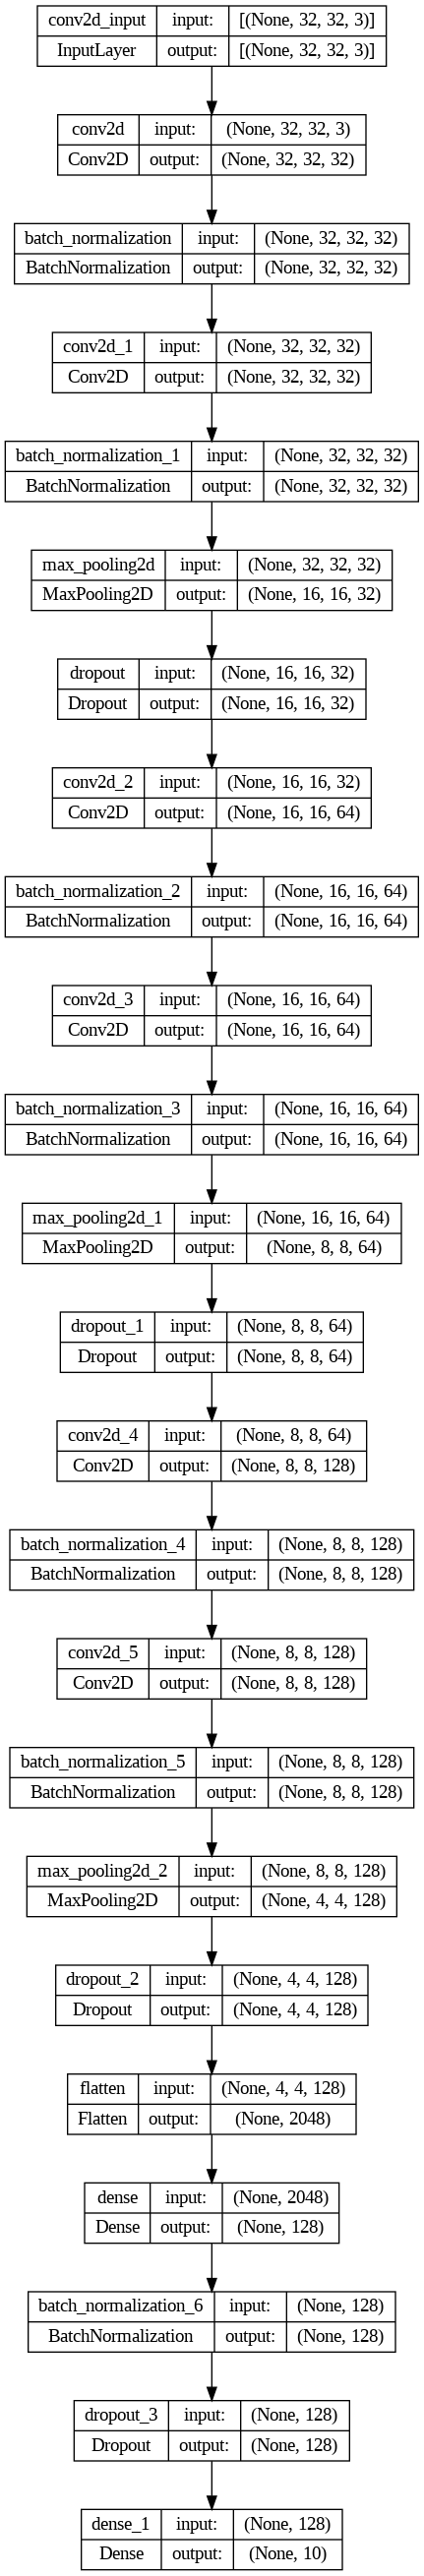

In [15]:
plot_model(model, to_file='cnn-CIFAR10.png', show_shapes=True, show_layer_names=True)

### 6. Compilando o modelo

Compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
* mais informações em https://keras.io/losses/
* mais informações em https://keras.io/optimizers/
* mais informações em https://keras.io/metrics/

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])                  

### 7. Treinando o modelo

In [17]:
from keras.callbacks import ModelCheckpoint

#O keras passa a salvar o melhor modelo pela acurácia de validação

In [18]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')
                              
hist = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/100
704/704 [==============================] - ETA: 0s - loss: 1.7602 - accuracy: 0.3971
Epoch 1: val_accuracy improved from -inf to 0.52120, saving model to /content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5
704/704 [==============================] - 18s 13ms/step - loss: 1.7602 - accuracy: 0.3971 - val_loss: 1.3155 - val_accuracy: 0.5212
Epoch 2/100
703/704 [============================>.] - ETA: 0s - loss: 1.2247 - accuracy: 0.5617
Epoch 2: val_accuracy improved from 0.52120 to 0.63200, saving model to /content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5
704/704 [==============================] - 9s 12ms/step - loss: 1.2248 - accuracy: 0.5616 - val_loss: 1.0155 - val_accuracy: 0.6320
Epoch 3/100
704/704 [==============================] - ETA: 0s - loss: 1.0316 - accuracy: 0.6341
Epoch 3: val_accuracy improved from 0.63200 to 0.65620, saving model to /content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5
704/704 [==============================] - 10s 15ms/step 

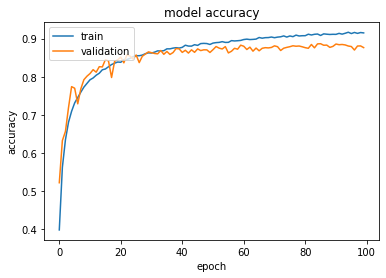

In [19]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Carregar o melhor modelo que obteve a melhor acurácia de validação no treinamento

In [20]:
model = load_model("/content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5")

### 8. Cálculo da precisão de classificação no dataset de testes

Avaliar e imprimir a precisão do teste

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))


 Test accuracy: 0.8765000104904175

accuracy: 87.65%


### 9. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
Obtendo previsões no conjunto de testes:

In [23]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [24]:
y_hat = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [25]:
y_hat

array([[2.9033518e-07, 1.2493678e-07, 1.0700243e-06, ..., 1.2608915e-08,
        2.6066177e-08, 9.8606368e-09],
       [3.5606297e-07, 6.1117578e-04, 6.1173844e-12, ..., 2.7658351e-14,
        9.9938846e-01, 5.8515738e-08],
       [3.7392285e-05, 1.5823547e-02, 9.3986620e-07, ..., 4.3238590e-08,
        9.8413116e-01, 5.1532479e-06],
       ...,
       [1.0403164e-08, 7.2942626e-08, 2.4086423e-05, ..., 1.0144460e-05,
        2.0472800e-07, 6.7422218e-07],
       [2.8188335e-04, 9.9917221e-01, 3.5479507e-06, ..., 3.0388849e-06,
        3.0550209e-06, 6.7522660e-06],
       [2.1740737e-08, 1.5986585e-08, 2.6990361e-07, ..., 9.9945396e-01,
        2.2774180e-09, 2.6206112e-10]], dtype=float32)

In [26]:
y_hat[100,:]

array([2.1477048e-05, 5.1506407e-07, 9.7495533e-04, 8.8499641e-05,
       9.5692581e-01, 3.4117472e-04, 4.9944156e-05, 4.1589085e-02,
       7.6390806e-06, 8.6117194e-07], dtype=float32)

In [27]:
np.argmax(y_hat[100,:])

4

In [28]:
y_test[100,:]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [29]:
np.argmax(y_test[100,:])

4

Definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

Plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

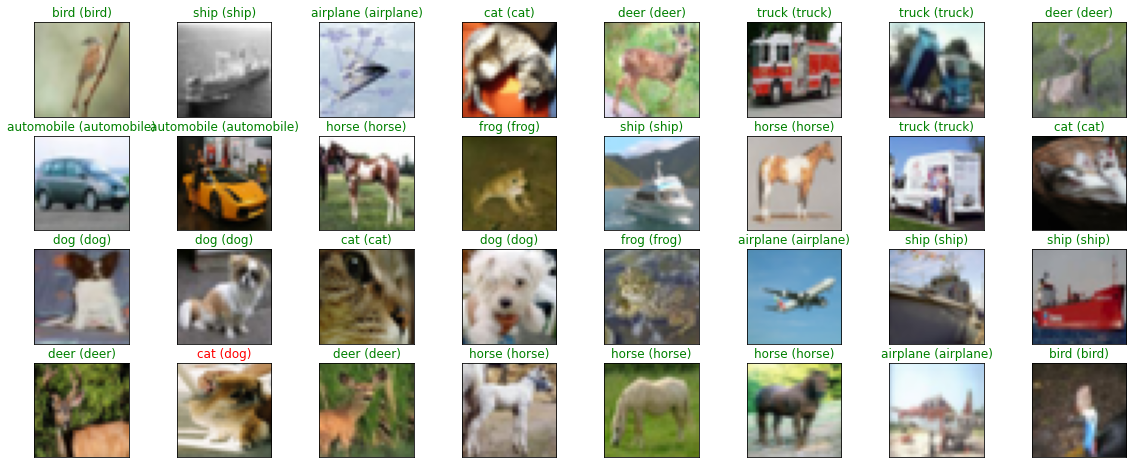

In [30]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
